In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [2]:
#PARAMETERS:

#Masses:
m1=5 ; m2=1 ; m3=2 ; m4=4 ; m5=6

#Spring constants:
c1=1 ; c2=5 ; c3=3 ; c4=4 ; c5=3

#Damping constants:
g1=0.1 ; g2=0.3 ; g3=0.2 ; g4=0.1 ; g5=0.2

#----------------------------------------------------------------------------------------

#INITIAL CONDITIONS:

#Initial Conditions 1:
u11=0. ; u21=0. ; u31=0. ; u41=0. ; u51=1.
du11=0. ; du21=0. ; du31=0. ; du41=0. ; du51=0.

ic1m=[u11,u21,u31,u41,u51,du11,du21,du31,du41,du51]

#Initial Conditions 2:
u12=0. ; u22=0. ; u32=0. ; u42=0. ; u52=0.
du12=0. ; du22=1. ; du32=0. ; du42=0. ; du52=0.

ic2m=[u12,u22,u32,u42,u52,du12,du22,du32,du42,du52]

#Initial Conditions 3:
u13=0. ; u23=0. ; u33=0. ; u43=0. ; u53=1.
du13=0. ; du23=1. ; du33=0. ; du43=0. ; du53=0.
      
ic3m=[u13,u23,u33,u43,u53,du13,du23,du33,du43,du53]

In [3]:
def setAnchor(sol,steps):
    #anchor points below y=0
    anch = [2,4,6,8,10]
    #list to store modified solutions
    y_list = []
    
    #change solution anchorpoints
    for i in range(0,10):
        if(i<5):
            for j in range(0,steps):
                sol[i,j] = sol[i,j]-anch[i]
        y_list.append(sol[i])
    return y_list

In [4]:
def spring(a,b,pos):
    A = 1/50
    waves = 5
    dy = b-a
    Y = np.linspace(0,dy,100)
    X = A*np.sin(waves/dy*2*np.pi*Y)+pos
    
    return [X,Y+a]

In [5]:
#Plot Displacement and Velocity vs. Time
def graph32(T,Y,tNum):
    #Title Bank
    titleList321 = ["Displacements of Damped and Free System (Ini. Cond. 1)","Velocities of Damped and Free System (Ini. Cond. 1)"]
    titleList322 = ["Displacements of Damped and Free System (Ini. Cond. 2)","Velocities of Damped and Free System (Ini. Cond. 2)"]
    titleList323 = ["Displacements of Damped and Free System (Ini. Cond. 3)","Velocities of Damped and Free System (Ini. Cond. 3)"]
    titles32 = [titleList321,titleList322,titleList323]
    
    #Displacement vs. Time
    for i in range(0,5):
        plt.rcParams['font.family'] = 'serif'
        plt.plot(T, Y[i], label = "u"+'{:01d}'.format(i+1))
    plt.title(titles32[tNum][0])
    plt.xlabel("Time", size=11.5)
    plt.ylabel("Displacement", size=11.5)
    plt.grid()
    plt.legend(loc=1)
    plt.savefig('Graphs/Graphs2/D{:01d}.pdf'.format(tNum+1))
    plt.show()

    #Velocity vs. Time
    for i in range(5,10):
        plt.plot(T, Y[i], label = "v"+'{:01d}'.format(i-4))
        plt.rcParams['font.family'] = 'serif'
    plt.title(titles32[tNum][1])
    plt.xlabel("Time", size=11.5)
    plt.ylabel("Velocity", size=11.5)
    plt.grid()
    plt.legend(loc=1)
    plt.savefig('Graphs/Graphs2/V{:01d}.pdf'.format(tNum+1))
    plt.show()

In [6]:
#3.2 DAMPED & FREE
#The Parameter Matrix P
m32 = [[0,0,0,0,0,1,0,0,0,0],
       [0,0,0,0,0,0,1,0,0,0],
       [0,0,0,0,0,0,0,1,0,0],
       [0,0,0,0,0,0,0,0,1,0],
       [0,0,0,0,0,0,0,0,0,1],
       [(-c1-c2)/m1,(c2)/m1,0,0,0,-g1/m1,0,0,0,0],
       [(c2)/m2,(-c2-c3)/m2,(c3)/m2,0,0,0,-g2/m2,0,0,0],
       [0,(c3)/m3,(-c3-c4)/m3,(c4)/m3,0,0,0,-g3/m3,0,0],
       [0,0,(c4)/m4,(-c4-c5)/m4,(c5)/m4,0,0,0,-g4/m4,0],
       [0,0,0,(c5)/m5,(-c5)/m5,0,0,0,0,-g5/m5]]

In [7]:
#3.2 Set up Linspace and Time Interval
steps = 1000
t = np.linspace(0.0, 60.0, steps)
ts = (0,60)

In [8]:
#3.2 System of Differential Equations
def DE32(t,y):
    return np.matmul(m32,y)

In [9]:
#Numerical Solutions for Initial Conditions 1,2 and 3
sol45y321 = solve_ivp(DE32, ts, ic1m, t_eval=t, method='RK45')
sol45y322 = solve_ivp(DE32, ts, ic2m, t_eval=t, method='RK45')
sol45y323 = solve_ivp(DE32, ts, ic3m, t_eval=t, method='RK45')

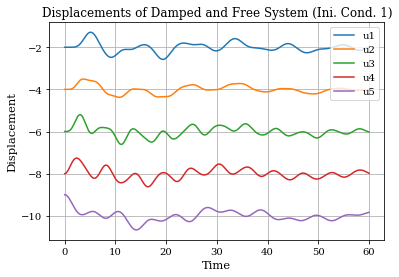

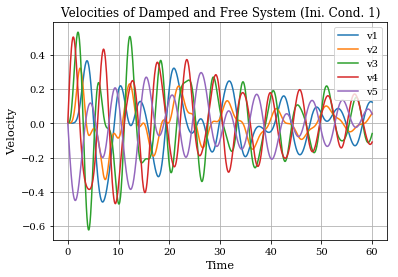

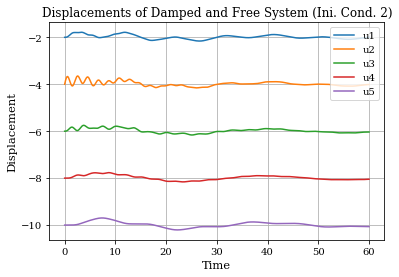

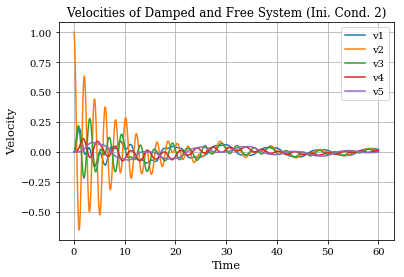

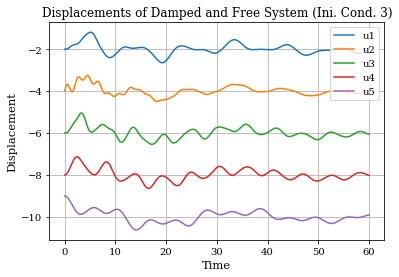

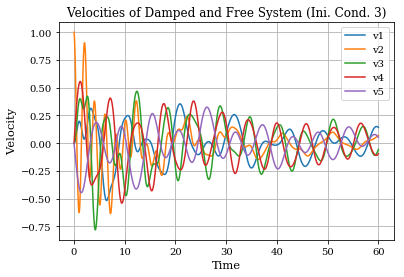

In [10]:
#3.2 Damped and Free System Graphs
sol321 = setAnchor(sol45y321.y,steps)
sol322 = setAnchor(sol45y322.y,steps)
sol323 = setAnchor(sol45y323.y,steps)

#Graphs
graph32(t,sol321,0) #INITIAL CONDITION 1
graph32(t,sol322,1) #INITIAL CONDITION 2
graph32(t,sol323,2) #INITIAL CONDITION 3

<IPython.core.display.Javascript object>


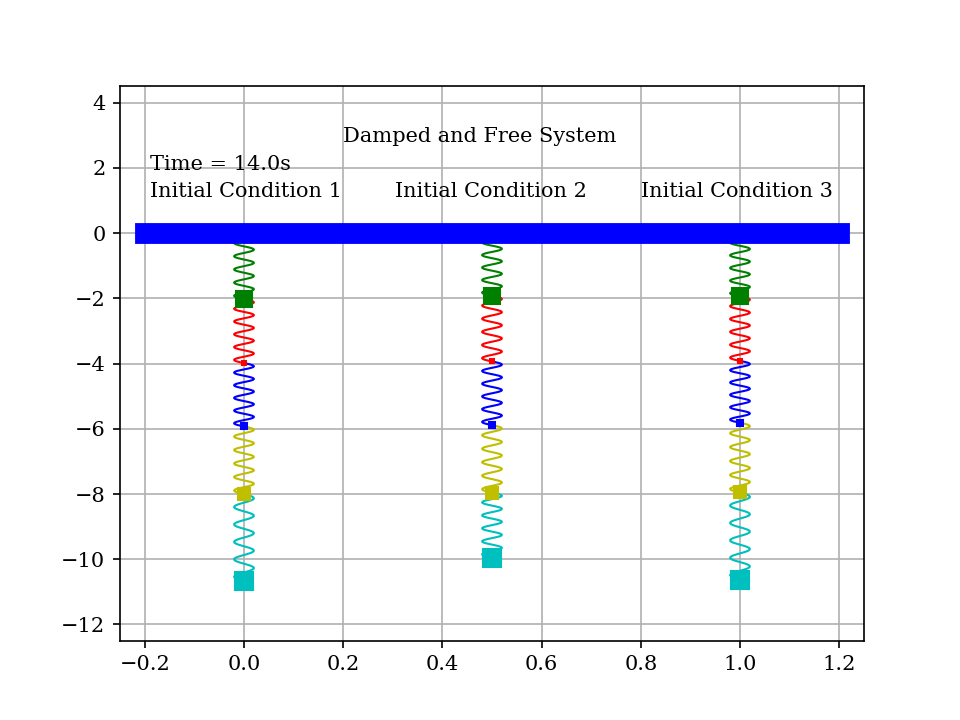

In [12]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.25, 1.25), ylim=(-12.5, 4.5))
ax.grid()

dt = 60/1000

#Plot Elements
#INITIAL CONDITION 1
spring1, = ax.plot([], [],'g-', lw=1)
spring2, = ax.plot([], [],'r-', lw=1)
spring3, = ax.plot([], [],'b-', lw=1)
spring4, = ax.plot([], [],'y-', lw=1)
spring5, = ax.plot([], [],'c-', lw=1)
mass1, = ax.plot([], [],'gs', markersize = 1.5*m1)
mass2, = ax.plot([], [],'rs', markersize = 1.5*m2)
mass3, = ax.plot([], [],'bs', markersize = 1.5*m3)
mass4, = ax.plot([], [],'ys', markersize = 1.5*m4)
mass5, = ax.plot([], [],'cs', markersize = 1.5*m5)

#INITIAL CONDITION 2
spring6, = ax.plot([], [],'g-', lw=1)
spring7, = ax.plot([], [],'r-', lw=1)
spring8, = ax.plot([], [],'b-', lw=1)
spring9, = ax.plot([], [],'y-', lw=1)
spring10, = ax.plot([], [],'c-', lw=1)
mass6, = ax.plot([], [],'gs', markersize = 1.5*m1)
mass7, = ax.plot([], [],'rs', markersize = 1.5*m2)
mass8, = ax.plot([], [],'bs', markersize = 1.5*m3)
mass9, = ax.plot([], [],'ys', markersize = 1.5*m4)
mass10, = ax.plot([], [],'cs', markersize = 1.5*m5)

#INITIAL CONDITION 3
spring11, = ax.plot([], [],'g-', lw=1)
spring12, = ax.plot([], [],'r-', lw=1)
spring13, = ax.plot([], [],'b-', lw=1)
spring14, = ax.plot([], [],'y-', lw=1)
spring15, = ax.plot([], [],'c-', lw=1)
mass11, = ax.plot([], [],'gs', markersize = 1.5*m1)
mass12, = ax.plot([], [],'rs', markersize = 1.5*m2)
mass13, = ax.plot([], [],'bs', markersize = 1.5*m3)
mass14, = ax.plot([], [],'ys', markersize = 1.5*m4)
mass15, = ax.plot([], [],'cs', markersize = 1.5*m5)

bar, = ax.plot([], [], 'b-', lw=10)

#TEXT
time_template = 'Time = '
time_text = ax.text(0.04, 0.85, '', transform=ax.transAxes)

init1 = ax.text(0.04, 0.8, '', transform=ax.transAxes)
init2 = ax.text(0.37, 0.8, '', transform=ax.transAxes)
init3 = ax.text(0.7, 0.8, '', transform=ax.transAxes)

title = ax.text(0.3, 0.9, '', transform=ax.transAxes)

def init():
    spring1.set_data([], [])
    spring2.set_data([], [])
    spring3.set_data([], [])
    spring4.set_data([], [])
    spring5.set_data([], [])
    spring6.set_data([], [])
    spring7.set_data([], [])
    spring8.set_data([], [])
    spring9.set_data([], [])
    spring10.set_data([], [])
    spring11.set_data([], [])
    spring12.set_data([], [])
    spring13.set_data([], [])
    spring14.set_data([], [])
    spring15.set_data([], [])
    mass1.set_data([], [])
    mass2.set_data([], [])
    mass3.set_data([], [])
    mass4.set_data([], [])
    mass5.set_data([], [])
    mass6.set_data([], [])
    mass7.set_data([], [])
    mass8.set_data([], [])
    mass9.set_data([], [])
    mass10.set_data([], [])
    mass11.set_data([], [])
    mass12.set_data([], [])
    mass13.set_data([], [])
    mass14.set_data([], [])
    mass15.set_data([], [])
    
    time_text.set_text('')
    init1.set_text('')
    init2.set_text('')
    init3.set_text('')
    title.set_text('')
    return spring1, spring2, spring3, spring4, spring5, spring6, spring7, spring8, spring9, spring10, spring11, spring12, spring13, spring14, spring15, mass1, mass2, mass3, mass4, mass5, mass6, mass7, mass8, mass9, mass10, mass11, mass12,mass13,mass14,mass15, time_text, init1, init2, init3, title

def animate(i):
    
    bar.set_data([-0.2,1.2],[0])
    
    #Initial Condition 1 pos=0
    xpos1 = 0.0
    
    x1,y1 = spring(0,sol321[0][i],xpos1)
    spring1.set_data(x1,y1)
    
    x2,y2 = spring(sol321[0][i],sol321[1][i],xpos1)
    spring2.set_data(x2,y2)
    
    x3,y3 = spring(sol321[1][i],sol321[2][i],xpos1)
    spring3.set_data(x3,y3)
    
    x4,y4 = spring(sol321[2][i],sol321[3][i],xpos1)
    spring4.set_data(x4,y4)
    
    x5,y5 = spring(sol321[3][i],sol321[4][i],xpos1)
    spring5.set_data(x5,y5)
    
    mass1.set_data(xpos1,sol321[0][i])
    mass2.set_data(xpos1,sol321[1][i])
    mass3.set_data(xpos1,sol321[2][i])
    mass4.set_data(xpos1,sol321[3][i])
    mass5.set_data(xpos1,sol321[4][i])
    
    #Initial Condition 2 pos=0.5
    xpos2 = 0.5
    
    x6,y6 = spring(0,sol322[0][i],xpos2)
    spring6.set_data(x6,y6)
    
    x7,y7 = spring(sol322[0][i],sol322[1][i],xpos2)
    spring7.set_data(x7,y7)
    
    x8,y8 = spring(sol322[1][i],sol322[2][i],xpos2)
    spring8.set_data(x8,y8)
    
    x9,y9 = spring(sol322[2][i],sol322[3][i],xpos2)
    spring9.set_data(x9,y9)
    
    x10,y10 = spring(sol322[3][i],sol322[4][i],xpos2)
    spring10.set_data(x10,y10)
    
    mass6.set_data(xpos2,sol322[0][i])
    mass7.set_data(xpos2,sol322[1][i])
    mass8.set_data(xpos2,sol322[2][i])
    mass9.set_data(xpos2,sol322[3][i])
    mass10.set_data(xpos2,sol322[4][i])
    
    #Initial Condition 3 pos=1.0
    xpos3 = 1.0
    
    x11,y11 = spring(0,sol323[0][i],xpos3)
    spring11.set_data(x11,y11)
    
    x12,y12 = spring(sol323[0][i],sol323[1][i],xpos3)
    spring12.set_data(x12,y12)
    
    x13,y13 = spring(sol323[1][i],sol323[2][i],xpos3)
    spring13.set_data(x13,y13)
    
    x14,y14 = spring(sol323[2][i],sol323[3][i],xpos3)
    spring14.set_data(x14,y14)
    
    x15,y15 = spring(sol323[3][i],sol323[4][i],xpos3)
    spring15.set_data(x15,y15)
   
    mass11.set_data(xpos3,sol323[0][i])
    mass12.set_data(xpos3,sol323[1][i])
    mass13.set_data(xpos3,sol323[2][i])
    mass14.set_data(xpos3,sol323[3][i])
    mass15.set_data(xpos3,sol323[4][i])
    
    time_text.set_text(time_template + '{:4.1f}'.format(i*dt) + 's')
    init1.set_text("Initial Condition 1")
    init2.set_text("Initial Condition 2")
    init3.set_text("Initial Condition 3")
    title.set_text("Damped and Free System")
    return spring1, spring2, spring3, spring4, spring5, spring6, spring7, spring8, spring9, spring10, spring11, spring12, spring13, spring14, spring15,mass1, mass2, mass3, mass4, mass5, mass6, mass7, mass8, mass9, mass10, mass11, mass12, mass13, mass14, mass15, time_text, init1, init2, init3, title

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                             interval=20, blit=True, init_func=init)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=24, metadata=dict(artist='Me'), bitrate=1800)
ani.save('Animations/Animation2/animation2.mp4', writer=writer, dpi=400)